# Temporal variablity for each HRU (Hydrological Response Units)

# use dropdown to change with LULC, SOILTYEPE, SLOPE.. for HUR AND SUBBASINA

##### HRU is the smallest model spatial unit with distinct slope, land use and soil units

- #### Select sub-catchments

- #### Data with distinct HRU for the given sub-basins

- #### Filter each unique HRU

- #### Prepare time series 

In [1]:
#library(RODBC) # Not available
#library(dplyr) 
library(ggplot2); library(tidyr);library(scales);library(gridExtra)

## Importing the subbasin file

In [2]:
Reach_info <- read.csv(file = "HRU_Default.csv", sep = ",")

In [3]:
# data-of-interest "HRU"
Reach_info$YYYYMMDD <- as.Date(as.character(Reach_info$YYYYMMDD), "%Y%m%d")


In [4]:
Reach_info$HRU <- as.character(Reach_info$HRU)

In [5]:
head(Reach_info)

YYYYMMDD,LULC,HRU,HRUGIS,SUB,MON,DAY,YEAR,AREAkm2,PRECIPmm,⋯,BACTPct,BACTLPct,WATB_CLI,WATB_SOL,SNOmm,CMUPkg.ha,CMTOTkg.ha,QTILEmm,TNO3kg.ha,LNO3kg.ha
<date>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
2001-01-01,HAY,1,10001,1,1,1,2001,0.69882,0,⋯,0,0,0.0711,1920,0,0,0,0,0,0
2001-01-01,PAST,2,10002,1,1,1,2001,0.13243,0,⋯,0,0,0.0711,1920,0,0,0,0,0,0
2001-01-01,RNGB,3,10003,1,1,1,2001,31.50200,0,⋯,0,0,0.0745,1920,0,0,0,0,0,0
2001-01-01,ALFA,4,10004,1,1,1,2001,1.25880,0,⋯,0,0,0.0711,1920,0,0,0,0,0,0
2001-01-01,SWHT,5,10005,1,1,1,2001,0.22372,0,⋯,0,0,0.0751,1920,0,0,0,0,0,0
2001-01-01,CORN,6,10006,1,1,1,2001,0.60367,0,⋯,0,0,0.1180,1920,0,0,0,0,0,0


In [6]:
#colnames(Reach_info)

### Change Subbasin name

In [7]:
name <- "117"
reach_dataframe <- as.data.frame(Reach_info)

# Add image file to show the location of name - subcatchment

In [8]:
#Out_let <- reach_dataframe %>% filter(SUB == name)
Out_let <- reach_dataframe[which (reach_dataframe$SUB == name ),]
#colnames(Out_let)

In [9]:
#colnames(Out_let)

In [10]:
Reach_info$HRU <- as.character(Reach_info$HRU)

In [11]:
landuse <- as.factor(Out_let$LULC)

### Unique HRU and thier landuse land cover

In [12]:
unique(Out_let$HRU)

[1] "734" "735" "736" "737" "738" "739" "740" "741"

In [13]:
unique(data.frame(HRU_no = Out_let$HRU, name = landuse))

HRU_no,name
<fct>,<fct>
734,HAY
735,PAST
736,ALFA
737,SWHT
738,CORN
739,WWHT
740,POTA
741,WATR


 ### Total number of active HRU for the whole basin

In [14]:
length(as.numeric(Out_let$HRU))/length(unique(Out_let$HRU)) 

[1] 730

### Simulation time

In [15]:
length(unique(Out_let$HRU))*365*2

[1] 5840

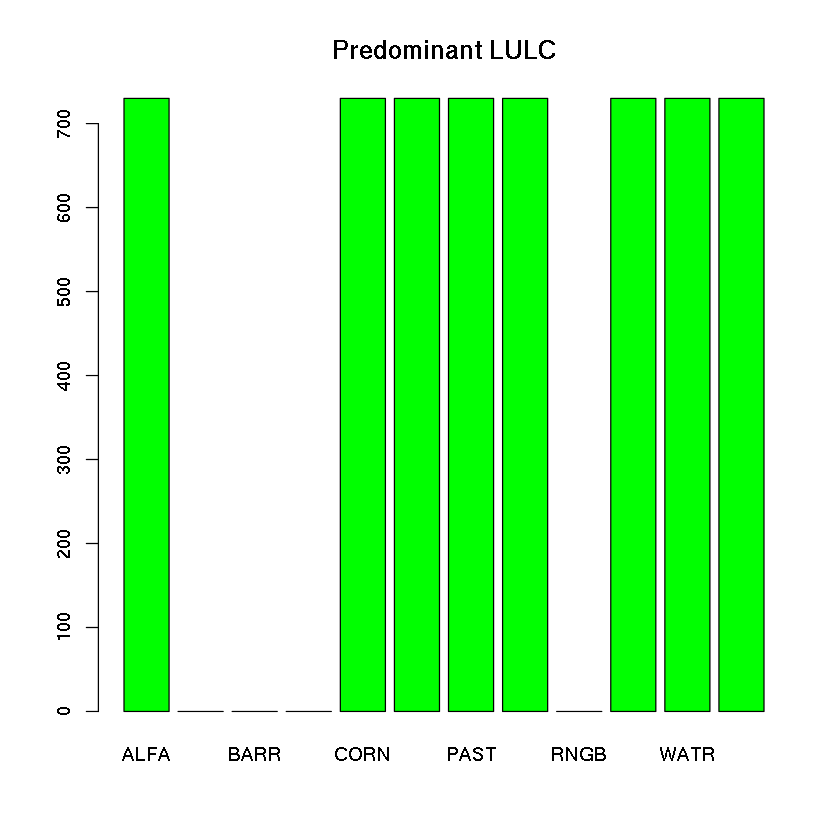

In [16]:
plot(landuse, main= "Predominant LULC", col = "green") 

In [17]:
#plot(unique(landuse), main= "Predominant LULC", col = "green") 
#legend (10, 400, legend = c("Alfalfa", "Apple", "Barley", "Bermudagrass", "Corn","Hay", "Pasture","Potato", 
                            #"Range Grass","Spring Wheat", "Water", "Winter Wheat"), ylim(0,1))

In [18]:
length(landuse)

[1] 5840

In [19]:
#data.frame(HRU_no = Out_let$HRU, name = landuse)

In [20]:
p <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=PETmm, color=HRU)) + 
  geom_line()
p <- p + ggtitle(paste0("Potential Evapotranspiration at sub-basin", name)) + 
               xlab("Year") + ylab("PET in mm")
#p

In [21]:
str(landuse)

 Factor w/ 12 levels "ALFA","APPL",..: 6 7 1 10 5 12 8 11 6 7 ...


In [22]:
a <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=ETmm, color=HRU)) + 
  geom_line()
a <- a + ggtitle(paste0("Actual Evapotranspiration at sub-basin", name)) + 
                ylab("AET in mm") + xlab("Year")
#a

<font color=blue>End

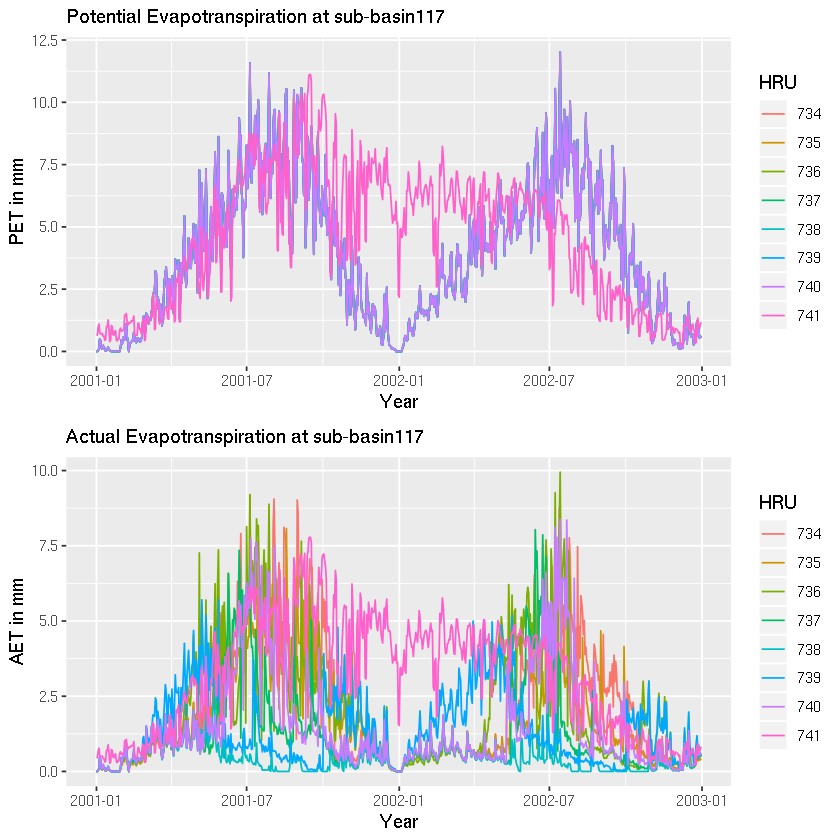

In [23]:
grid.arrange(p,a)

In [24]:
a <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=ETmm/PETmm, color=HRU)) + 
  geom_line()

Warning message:
“Removed 14 rows containing missing values (geom_path).”

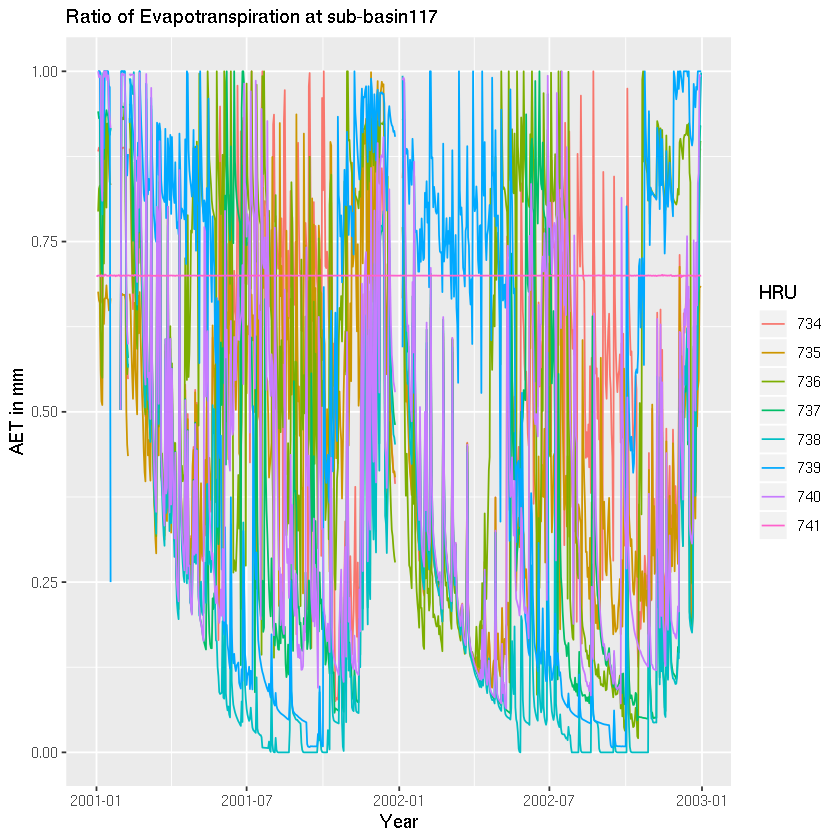

In [25]:
a <- a + ggtitle(paste0("Ratio of Evapotranspiration at sub-basin", name)) + 
                ylab("AET in mm") + xlab("Year")
a

## Other hydrological flux for each HRU of the given sub-basin

In [26]:
Snow <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=SNOWMELTmm, color=HRU)) + 
  geom_line()

Snow <- Snow + ggtitle(paste0("Snowmelt at sub-basin", name)) + 
                xlab("Year") + ylab("Snowmelt in mm")



In [27]:
Irri <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=IRRmm, color=HRU)) + 
  geom_line()

Irri <- Irri + ggtitle(paste0("Amount of Irrigation Applied at sub-basin", name)) + 
        xlab("Year")+ ylab("Irrigation in mm") 


In [28]:
SW <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=SW_ENDmm, color=HRU)) + 
  geom_line()

SW <- SW + ggtitle(paste0("Soil Water Content at the End of the Smulation at sub-basin", name)) + 
                ylab("Soil Water Containt in mm") + xlab("Year")

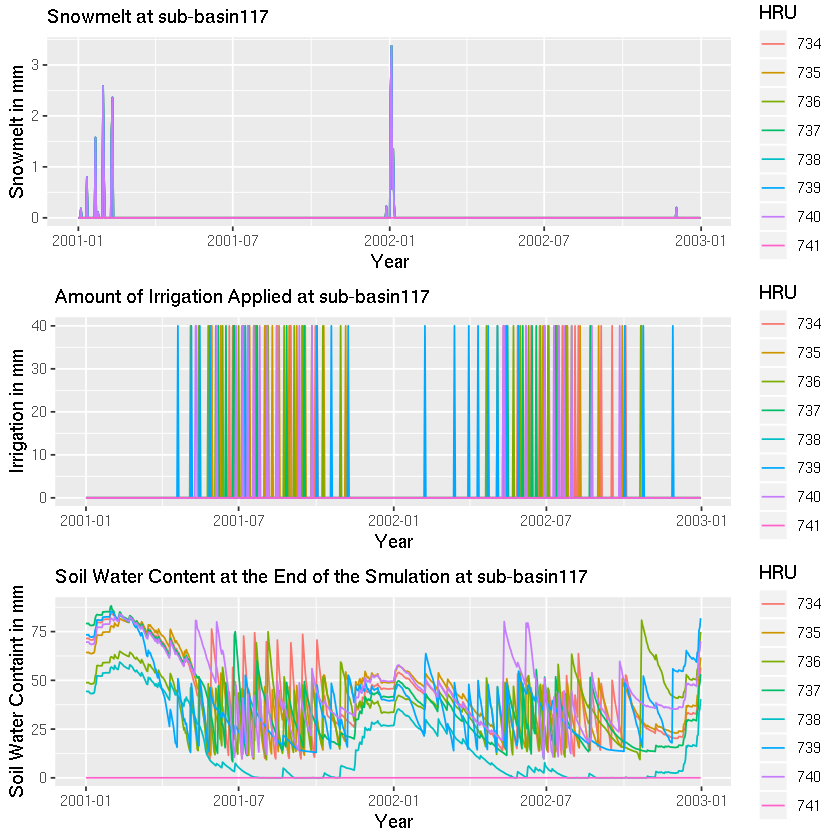

In [29]:
grid.arrange(Snow, Irri, SW)

In [30]:
# plot the finest resolution [daily average / soil moisutre depth - Total or certailn]

In [31]:
RO <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=SURQ_GENmm, color=HRU)) + 
  geom_line()

RO <- RO + ggtitle(paste0("Surface Runoff Generated At each HRU at sub-basin", name)) + 
                ylab("Surface Runoff in mm") + xlab("Year")
#RO

# Temporal variablity for each sub-basins

In [32]:
rm(list = ls())
#cat("/014")

In [33]:
#library(RODBC) # Not available
#library(dplyr) 
library(ggplot2); library(tidyr);library(scales);library(gridExtra)

## Importing the subbasin file

In [34]:
Reach_info <- read.csv(file = "Subbasin_Default.csv", sep = ",")

In [35]:
# data-of-interest "rch"
Reach_info$YYYYMMDD <- as.Date(as.character(Reach_info$YYYYMMDD), "%Y%m%d")


In [36]:
#colnames(Reach_info)

In [37]:
head(Reach_info)

YYYYMMDD,SUB,Mon,DAY,YEAR,AREAkm2,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,⋯,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL1kg,CMETAL2kg,CMETAL3kg,TOT_Nkg,TOT_Pkg,NO3CONCmg.l,WTMPdegc
<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2001-01-01,1,1,1,2001,35.11,3.802e-05,3.802e-05,0,0,⋯,0,0,0,0,0,0,6.385e-03,2.267e-03,0,4.213
2001-01-01,2,1,1,2001,22.88,2.105e-07,2.105e-07,0,0,⋯,0,0,0,0,0,0,3.863e-06,7.099e-06,0,4.213
2001-01-01,3,1,1,2001,27.67,9.093e-05,9.093e-05,0,0,⋯,0,0,0,0,0,0,5.508e-02,1.088e-05,0,4.213
2001-01-01,4,1,1,2001,28.13,1.292e-04,1.292e-04,0,0,⋯,0,0,0,0,0,0,7.857e-02,1.210e-05,0,4.213
2001-01-01,5,1,1,2001,61.77,2.306e-04,2.306e-04,0,0,⋯,0,0,0,0,0,0,1.364e-01,4.890e-05,0,4.213
2001-01-01,6,1,1,2001,115.90,5.779e-04,5.779e-04,0,0,⋯,0,0,0,0,0,0,1.838e-01,1.977e-03,0,4.213


In [38]:
#colnames(Reach_info)

### Change Subbasin name

In [39]:
name <- "117"
reach_dataframe <- as.data.frame(Reach_info)

In [40]:
#Out_let <- reach_dataframe %>% filter(SUB == name)
Out_let <- reach_dataframe[which (reach_dataframe$SUB == name ),]
#colnames(Out_let)


In [46]:
p <- ggplot(data = Out_let, aes(x=as.Date(YYYYMMDD,  "%Y-%m-%d"), y=FLOW_OUTcms, fill=FLOW_OUTcms)) + 
  geom_line(color ="blue", size=1) + stat_smooth(color = "red", fill="red" , method= "loess") + 
  ggtitle(paste0("River dischargeat Subbasin-", name)) + 
  xlab("Year") + ylab("Discharge in (m3/s)")+ 
  theme(plot.title = element_text(hjust = 0.5, size = 16)) + 
  annotate("segment", x = as.Date(Out_let$YYYYMMDD[150]), xend = as.Date(Out_let$YYYYMMDD[300]), y = 2000, yend = 5500, 
           colour = "red", size = 1.5, alpha = 0.8,arrow = arrow()) + 
  annotate("label", x = as.Date(Out_let$YYYYMMDD[320]), y = 5800, label = "Trend", size =5)

In [47]:
p <- p + scale_x_date(breaks = pretty_breaks(10))

In [48]:
y <- ggplot(data = Out_let, aes(x=YYYYMMDD, y= NO3CONCmg.l)) + 
  geom_line(color ="blue", size=1) + stat_smooth(color = "red", fill="red" , method= "loess") + 
  ggtitle(paste0("Total Nitrate Concentration at Subbasin-", name)) + 
  xlab("Year") + ylab("Total Nitrate in (mg/l)")

In [49]:
y <- y + scale_x_date(breaks = pretty_breaks(10))

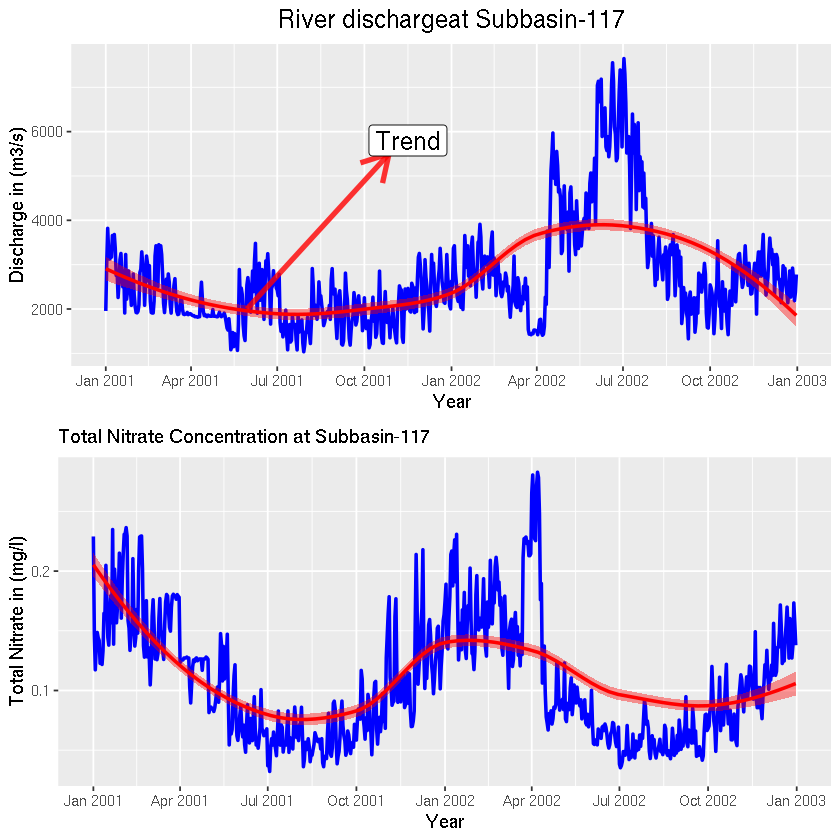

In [51]:
grid.arrange(p,y)

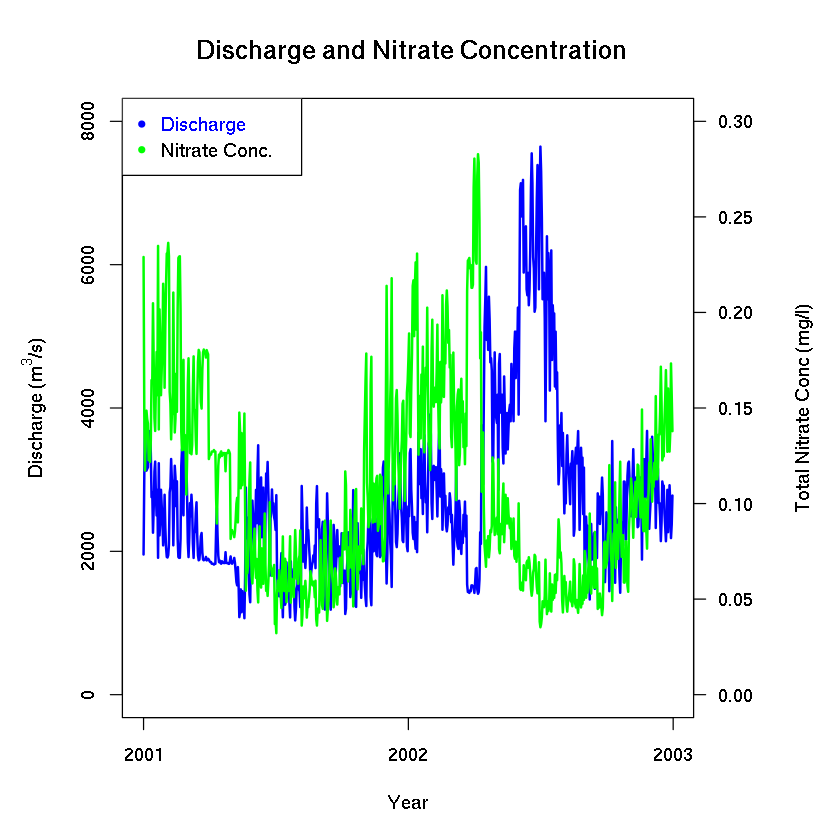

In [52]:
par(mar=c(5,5,4,6) + 0.1)
plot(Out_let$YYYYMMDD, Out_let$FLOW_OUTcms, col="blue",type = "l", lwd=2, ylim=c(0,8000), xlab = "", ylab="", main=" Discharge and Nitrate Concentration")
ylab.text <- expression(paste("Discharge (m"^"3", "/s)"))
mtext(ylab.text, side = 2, line = 3)
#axis(2, ylim=c(0,8000), col = "black", las=1)
par(new=TRUE)
plot(Out_let$YYYYMMDD, Out_let$NO3CONCmg.l, col= "green", type = "l", lwd = 2, xlab = "", ylim=c(0,0.3), ylab="",axes=FALSE)
mtext("Total Nitrate Conc (mg/l)", side=4, line=4)
axis(4, ylim=c(0,8000), col = "black", las=1)

legend("topleft", legend = c("Discharge", "Nitrate Conc."), 
       text.col = c("blue", "black"), pch = c(20,20), col=c("blue", "green"))
mtext("Year", side = 1, line = 3)

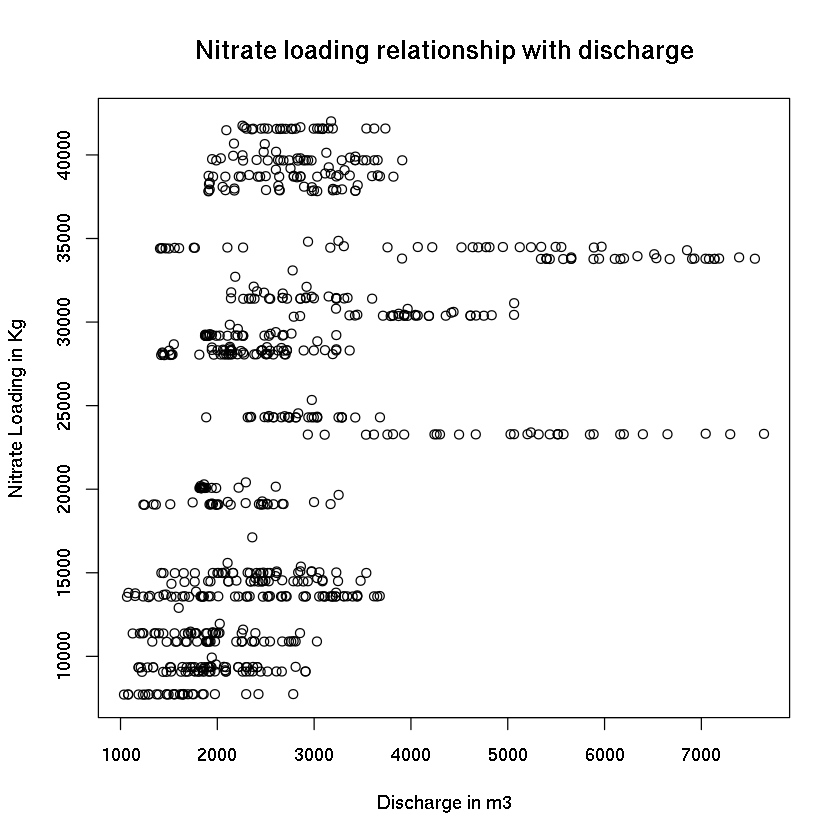

In [53]:
plot(Out_let$FLOW_OUTcms,Out_let$NO3_OUTkg, ylab = "Nitrate Loading in Kg", xlab = "Discharge in m3", 
    main ="Nitrate loading relationship with discharge")